# üìå Gradient Descent & Optimization - A Complete Guide

This notebook explores **optimization techniques** for machine learning models, including:  
‚úî **Gradient Descent (GD)**  
‚úî **Stochastic Gradient Descent (SGD)**  
‚úî **Mini-Batch Gradient Descent**  
‚úî **Comparison of different optimization strategies**  

---

## üìñ 1. Introduction to Gradient Descent

**Gradient Descent (GD)** is an iterative optimization algorithm used to **minimize a loss function** by adjusting model parameters.

üîπ **Key Idea**:
- Compute the **gradient (derivative) of the loss function**.
- Update parameters **in the opposite direction** of the gradient.
- Repeat until convergence.

‚úÖ **Works well for large parameter spaces**.  
‚ö† **Choosing a good learning rate is crucial**.

---

## üßÆ 2. Mathematics of Gradient Descent

Let‚Äôs consider a **loss function** $J(\theta)$ (e.g., Mean Squared Error for regression):

$$
J(\theta) = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x_i) - y_i)^2
$$

where:
- **$m$** = Number of training samples.
- **$h_{\theta}(x)$** = Hypothesis function (predictions).
- **$\theta$** = Model parameters.

### üîπ 1. Compute the Gradient

The gradient is the **partial derivative of $J(\theta)$ with respect to $\theta$**:

$$
\frac{\partial J}{\partial \theta} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x_i) - y_i) x_i
$$

### üîπ 2. Update Rule

At each iteration **$t$**, update parameters using:

$$
\theta^{(t+1)} = \theta^{(t)} - \alpha \frac{\partial J}{\partial \theta}
$$

where:
- **$\alpha$** is the **learning rate** (controls step size).
- **A small $\alpha$** ‚Üí Slow convergence.
- **A large $\alpha$** ‚Üí Risk of overshooting.

---

## üöÄ 3. Types of Gradient Descent

### üîπ 1. Batch Gradient Descent (BGD)
‚úÖ Uses **all training examples** in each update.  
‚ö† **Slow for large datasets** but provides a **stable convergence**.

$$
\theta := \theta - \alpha \frac{1}{m} \sum_{i=1}^{m} \nabla J_i(\theta)
$$

### üîπ 2. Stochastic Gradient Descent (SGD)
‚úÖ Updates **parameters after each training example**.  
‚ö† **Noisy updates**, can **converge faster** but may **not reach the exact minimum**.

$$
\theta := \theta - \alpha \nabla J_i(\theta)
$$

### üîπ 3. Mini-Batch Gradient Descent (MBGD)
‚úÖ Uses a **small random batch** of data per update.  
‚úÖ Balances between **convergence stability (Batch GD)** and **speed (SGD)**.

$$
\theta := \theta - \alpha \frac{1}{b} \sum_{i=1}^{b} \nabla J_i(\theta)
$$

where **$b$** is the **batch size** (e.g., 32, 64, 128).

---

## üî• 4. Implementing Gradient Descent in Python


In [1]:
# üì¶ Import required libraries
import numpy as np
import matplotlib.pyplot as plt

# ‚úÖ Generate synthetic data (y = 3x + 2 + noise)
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 3 * X + 2 + np.random.randn(100, 1) * 0.5  # Add noise

# Add bias term (X_0 = 1)
X_b = np.c_[np.ones((100, 1)), X]

# Initialize theta
theta = np.random.randn(2, 1)

# Learning rate & iterations
alpha = 0.1
epochs = 1000

# Store cost history
cost_history = []

# Batch Gradient Descent
for epoch in range(epochs):
    gradients = (1 / len(X_b)) * X_b.T.dot(X_b.dot(theta) - y)
    theta -= alpha * gradients
    cost = (1 / (2 * len(X_b))) * np.sum((X_b.dot(theta) - y) ** 2)
    cost_history.append(cost)

# Print final parameters
print(f"Final Theta (Batch GD): {theta.ravel()}")


Final Theta (Batch GD): [2.10754806 2.88505671]


## üìâ 5. Convergence Plot for Batch Gradient Descent


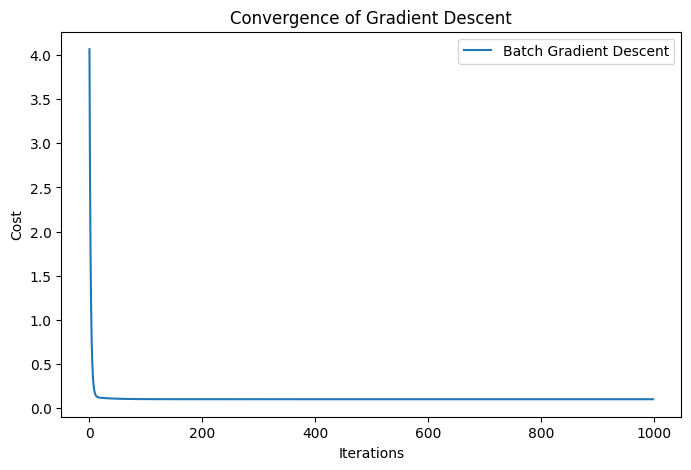

In [2]:
# Plot cost over iterations
plt.figure(figsize=(8, 5))
plt.plot(range(epochs), cost_history, label="Batch Gradient Descent")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Convergence of Gradient Descent")
plt.legend()
plt.show()


## ü§ñ 6. Implementing Stochastic Gradient Descent (SGD)


In [3]:
# Initialize theta
theta_sgd = np.random.randn(2, 1)

# Learning rate & epochs
alpha = 0.1
epochs = 50  # Fewer epochs for SGD

# Store cost history
cost_history_sgd = []

# Stochastic Gradient Descent
for epoch in range(epochs):
    for i in range(len(X_b)):
        random_index = np.random.randint(len(X_b))
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = xi.T.dot(xi.dot(theta_sgd) - yi)
        theta_sgd -= alpha * gradients
        cost = (1 / (2 * len(X_b))) * np.sum((X_b.dot(theta_sgd) - y) ** 2)
        cost_history_sgd.append(cost)

# Print final parameters
print(f"Final Theta (SGD): {theta_sgd.ravel()}")


Final Theta (SGD): [2.0582966  2.69863472]


## üéØ 7. Comparing Different Gradient Descent Methods

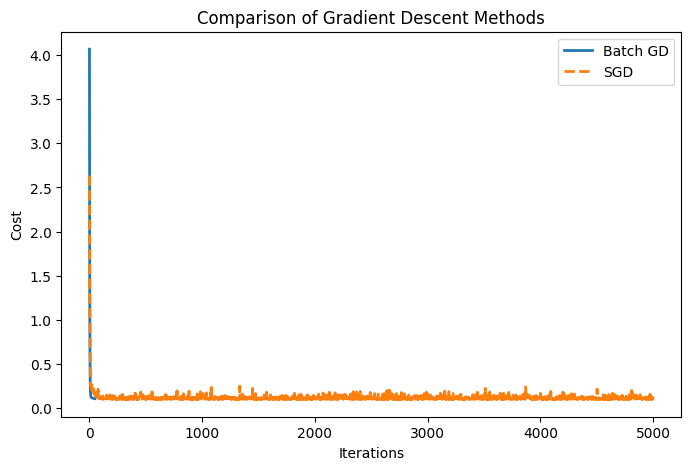

In [4]:
# Compare convergence
plt.figure(figsize=(8, 5))
plt.plot(range(epochs), cost_history[:epochs], label="Batch GD", linewidth=2)
plt.plot(range(len(cost_history_sgd)), cost_history_sgd, label="SGD", linewidth=2, linestyle="dashed")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Comparison of Gradient Descent Methods")
plt.legend()
plt.show()


# üìñ 8. Advanced Optimization Techniques: Adam & RMSprop

While **Gradient Descent** (GD, SGD, Mini-Batch GD) is effective, it can suffer from **slow convergence** or **poor handling of noisy gradients**.  
To improve performance, we use **adaptive optimization algorithms** like **RMSprop** and **Adam**.

---

## üßÆ 1. RMSprop (Root Mean Square Propagation)

### üîπ 1. Key Idea
- **Adjusts learning rate dynamically for each parameter**.
- **Large gradients ‚Üí Smaller learning rate** (prevents divergence).
- **Small gradients ‚Üí Larger learning rate** (prevents vanishing updates).

### üîπ 2. RMSprop Update Rule
For each parameter **$\theta$**, we maintain a moving average of squared gradients **$E[g^2]_t$**:

$$
E[g^2]_t = \beta E[g^2]_{t-1} + (1 - \beta) g_t^2
$$

where:
- **$g_t$** is the gradient at step **$t$**.
- **$\beta$** is the decay rate (typically **0.9**).
- **$E[g^2]_t$** stores past squared gradients.

The parameter update is:

$$
\theta_t := \theta_{t-1} - \frac{\alpha}{\sqrt{E[g^2]_t + \epsilon}} g_t
$$

‚úÖ **Why RMSprop?**  
- **Adapts the learning rate** per parameter.  
- **Great for non-stationary loss functions** (e.g., deep learning).  
- **Used in RNNs** where gradients vary significantly.

‚ö† **Requires tuning of decay rate ($\beta$).**  

---

## üßÆ 2. Adam (Adaptive Moment Estimation)

### üîπ 1. Key Idea
Adam **combines RMSprop and Momentum**:
- Uses **adaptive learning rates** (like RMSprop).
- Uses **momentum** to **smooth updates**.

### üîπ 2. Adam Update Rule
Adam keeps track of:
1. **First moment estimate (Momentum-like update)**:

   $$
   m_t = \beta_1 m_{t-1} + (1 - \beta_1) g_t
   $$

2. **Second moment estimate (Like RMSprop)**:

   $$
   v_t = \beta_2 v_{t-1} + (1 - \beta_2) g_t^2
   $$

3. **Bias correction for initialization**:

   $$
   \hat{m_t} = \frac{m_t}{1 - \beta_1^t}, \quad \hat{v_t} = \frac{v_t}{1 - \beta_2^t}
   $$

4. **Parameter update**:

   $$
   \theta_t := \theta_{t-1} - \frac{\alpha}{\sqrt{\hat{v_t}} + \epsilon} \hat{m_t}
   $$

where:
- **$\beta_1$ (momentum factor) = 0.9**
- **$\beta_2$ (RMSprop decay factor) = 0.999**
- **$\epsilon$ (stability constant) = $10^{-8}$**

‚úÖ **Why Adam?**  
- **Combines the best of SGD + RMSprop**.  
- **Adapts learning rates for different parameters**.  
- **Works well for deep learning, NLP, and non-convex problems**.  
- **Less sensitive to hyperparameter tuning**.

‚ö† **Can lead to poor generalization** if not tuned properly.

---

## üéØ 3. Implementing RMSprop & Adam in Python


In [6]:
# üì¶ Import required libraries
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data (y = 3x + 2 + noise)
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 3 * X + 2 + np.random.randn(100, 1) * 0.5

# Add bias term (X_0 = 1)
X_b = np.c_[np.ones((100, 1)), X]

# Initialize parameters
theta_rmsprop = np.random.randn(2, 1)
theta_adam = np.random.randn(2, 1)

# Learning rate & iterations
alpha = 0.01
epochs = 1000

# RMSprop parameters
beta_rms = 0.9
epsilon = 1e-8
E_g2_rmsprop = np.zeros((2, 1))

# Adam parameters
beta1 = 0.9
beta2 = 0.999
m_adam = np.zeros((2, 1))
v_adam = np.zeros((2, 1))

# Store cost history
cost_rmsprop = []
cost_adam = []

# Training Loop
for epoch in range(epochs):
    # Compute gradients
    gradients = (1 / len(X_b)) * X_b.T.dot(X_b.dot(theta_rmsprop) - y)
    
    # RMSprop update
    E_g2_rmsprop = beta_rms * E_g2_rmsprop + (1 - beta_rms) * gradients**2
    theta_rmsprop -= (alpha / (np.sqrt(E_g2_rmsprop) + epsilon)) * gradients
    cost_rmsprop.append((1 / (2 * len(X_b))) * np.sum((X_b.dot(theta_rmsprop) - y) ** 2))
    
    # Adam update
    m_adam = beta1 * m_adam + (1 - beta1) * gradients
    v_adam = beta2 * v_adam + (1 - beta2) * gradients**2
    m_adam_corr = m_adam / (1 - beta1**(epoch + 1))
    v_adam_corr = v_adam / (1 - beta2**(epoch + 1))
    theta_adam -= (alpha / (np.sqrt(v_adam_corr) + epsilon)) * m_adam_corr
    cost_adam.append((1 / (2 * len(X_b))) * np.sum((X_b.dot(theta_adam) - y) ** 2))

# Print final parameters
print(f"Final Theta (RMSprop): {theta_rmsprop.ravel()}")
print(f"Final Theta (Adam): {theta_adam.ravel()}")


Final Theta (RMSprop): [2.11254807 2.89005669]
Final Theta (Adam): [1.00326153 3.9243493 ]


## üìâ 4. Convergence Comparison

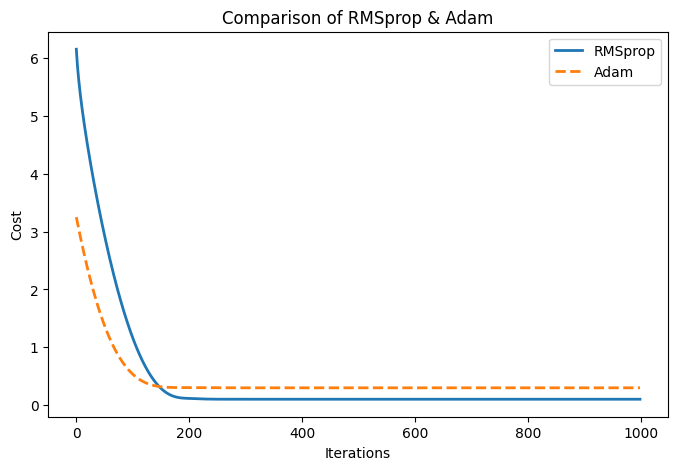

In [7]:
# Compare convergence
plt.figure(figsize=(8, 5))
plt.plot(range(epochs), cost_rmsprop, label="RMSprop", linewidth=2)
plt.plot(range(epochs), cost_adam, label="Adam", linewidth=2, linestyle="dashed")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Comparison of RMSprop & Adam")
plt.legend()
plt.show()


## üí° 9. Interview Questions

### üîπ **Gradient Descent Questions**
1Ô∏è‚É£ **What is the main objective of Gradient Descent?**  
   - Minimize a loss function by updating model parameters iteratively.

2Ô∏è‚É£ **What happens if the learning rate ($\alpha$) is too high?**  
   - The model may **overshoot the minimum**, leading to divergence.

3Ô∏è‚É£ **What happens if the learning rate ($\alpha$) is too low?**  
   - The model converges **very slowly**.

4Ô∏è‚É£ **What is the difference between Batch GD, SGD, and Mini-Batch GD?**  
   - **Batch GD:** Uses **all** training examples per update.  
   - **SGD:** Updates **one sample at a time** (noisy but fast).  
   - **Mini-Batch GD:** Uses **small batches** (tradeoff between speed & stability).

5Ô∏è‚É£ **How do you decide the batch size in Mini-Batch GD?**  
   - Typically **32, 64, 128** (powers of 2 for efficient computation).

6Ô∏è‚É£ **Why is SGD useful in deep learning?**  
   - Reduces **memory consumption**, updates faster, and can escape **local minima**.

---

### üîπ **RMSprop Questions**
7Ô∏è‚É£ **What problem does RMSprop solve?**  
   - RMSprop **adapts learning rates** based on past gradients to prevent divergence.

8Ô∏è‚É£ **Why does RMSprop use squared gradients?**  
   - It **scales updates proportionally** to past gradient magnitudes.

9Ô∏è‚É£ **Why is RMSprop useful for RNNs?**  
   - It stabilizes learning in **non-stationary** environments like sequences.

---

### üîπ **Adam Questions**
üîü **Why is Adam a combination of RMSprop and Momentum?**  
   - It **uses adaptive learning rates (RMSprop) and momentum (SGD)**.

1Ô∏è‚É£1Ô∏è‚É£ **Why does Adam require bias correction?**  
   - Without correction, early iterations underestimate updates.

1Ô∏è‚É£2Ô∏è‚É£ **When should you use Adam instead of SGD?**  
   - **Adam works best for deep learning & sparse gradients (e.g., NLP, CNNs).**  
   - **SGD works better when you have a lot of data and want better generalization.**

1Ô∏è‚É£3Ô∏è‚É£ **Why does Adam sometimes not generalize well?**  
   - Adam **adapts learning rates too aggressively**, which can lead to **overfitting**.

---
